## DATA 1030 Project Code

#### Checking for the DATA 1030 environment

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version
import warnings

# ignores all unnecessary warnings
warnings.filterwarnings('ignore')

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod

# first check the Python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)
    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

# re-enables warnings for future cells
warnings.filterwarnings('default')

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Part 1: Data Transformations

#### Reading in the CSV files

In [2]:
import pandas as pd

# instantiates a file stem as the files are too large to upload to GitHub
stem = '/Users/Aryan/Desktop/data-1030-project/data/'

# reads in the csv file with the crime data from 2010 to 2019
df_10_19 = pd.read_csv(stem + 'crime_data_2010_to_2019.csv')

# reads in the csv file with the crime data from 2020 to the present
df_20_pres = pd.read_csv(stem + 'crime_data_2020_to_present.csv')

#### Concatenating both dataframes into a single dataframe for analysis

In [3]:
# prints the column headers to see whether we can combine both dataframes seamlessly
print(list(df_10_19.columns))
print(list(df_20_pres.columns))

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']
['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']


In [4]:
# renames the only column that differs among the dataframes
df_10_19 = df_10_19.rename(columns = {'AREA ': 'AREA'})

# checks if the columns of the dataframes are the same
if list(df_10_19.columns) == list(df_20_pres.columns):
    print("The columns of both DataFrames are the same.")
else:
    print("The columns of the DataFrames are different.")

The columns of both DataFrames are the same.


In [5]:
# retrieves the first 5 rows of the first dataframe to see whether we can combine both dataframes seamlessly
df_10_19.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [6]:
# retrieves the first 5 rows of the second dataframe to see whether we can combine both dataframes seamlessly
df_20_pres.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
# checks the shape of each dataframe before concatenating
print(df_10_19.shape)
print(df_20_pres.shape)

(2119797, 28)
(708084, 28)


In [8]:
# concatenates the two dataframes and reindexes
df = pd.concat([df_10_19, df_20_pres], ignore_index = True)
df = df.reindex()

# checks the shape of the concatenated dataframe
print(df.shape)

(2827881, 28)


In [9]:
# retrieves the first 5 rows of the new dataframe
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


#### Modifying column formatting for clarity

In [10]:
# retrieves the datatypes of all the columns in the dataframe
print(df.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


In [11]:
# renames unclear columns in the dataframe
df = df.rename(columns = {
    'DR_NO': 'Record ID',
    'Date Rptd': 'Date Reported',
    'DATE OCC': 'Date Occurred',
    'TIME OCC': 'Time Occurred',
    'AREA': 'Area',
    'AREA NAME': 'Area Name',
    'Rpt Dist No': 'Report Dist No',
    'Crm Cd': 'Crime Code',
    'Crm Cd Desc': 'Crime Code Desc',
    'Vict Descent': 'Vict Race',
    'Premis Cd': 'Premise Code',
    'Premis Desc': 'Premise Desc',
    'Weapon Used Cd': 'Weapon Used Code',
    'Crm Cd 1': 'Crime Code 1',
    'Crm Cd 2': 'Crime Code 2',
    'Crm Cd 3': 'Crime Code 3',
    'Crm Cd 4': 'Crime Code 4',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'})

In [12]:
# instantiates a list of columns to adjust capitalization formatting
col_to_fix_cap = ['Crime Code Desc', 'Premise Desc', 'Weapon Desc', 'Location', 'Cross Street']

# capitalizes the first letter of each word in the specified columns
df[col_to_fix_cap] = df[col_to_fix_cap].applymap(lambda x: str(x).title() if not pd.isna(x) else x)

### Part 2: Exploratory Data Analysis

#### Visualizing the target variable, crime

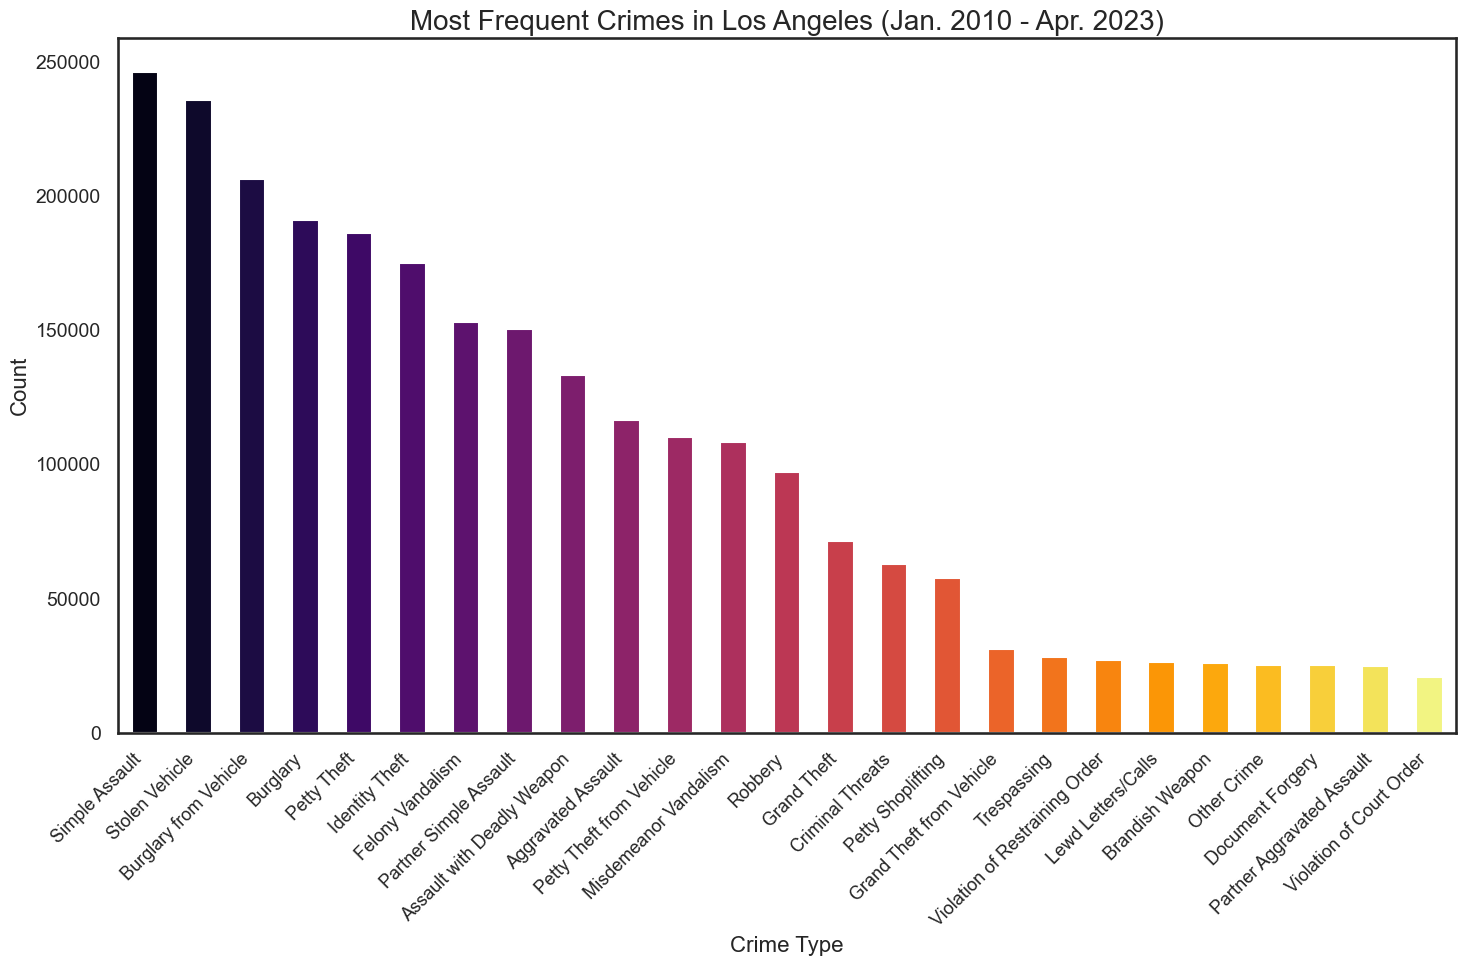

In [13]:
from matplotlib import pylab as plt
import seaborn as sns
import os

# sets a style and context
sns.set_style('white')
sns.set_context('talk') 

# filters crime categories based on a threshold of 20,000 occurrences
filtered_cat = pd.value_counts(df['Crime Code Desc'])
filtered_cat = filtered_cat[filtered_cat > 20000]

# retrieves the labels of the categories within the threshold
filtered_labels = list(filtered_cat.index)

# renames the labels of the categories for clarity
renamed_labels = {
    filtered_labels[0]: 'Simple Assault',
    filtered_labels[1]: 'Stolen Vehicle',
    filtered_labels[2]: 'Burglary from Vehicle',
    filtered_labels[3]: 'Burglary',
    filtered_labels[4]: 'Petty Theft',
    filtered_labels[5]: 'Identity Theft',
    filtered_labels[6]: 'Felony Vandalism',
    filtered_labels[7]: 'Partner Simple Assault',
    filtered_labels[8]: 'Assault with Deadly Weapon',
    filtered_labels[9]: 'Aggravated Assault',
    filtered_labels[10]: 'Petty Theft from Vehicle',
    filtered_labels[11]: 'Misdemeanor Vandalism',
    filtered_labels[12]: 'Robbery',
    filtered_labels[13]: 'Grand Theft',
    filtered_labels[14]: 'Criminal Threats',
    filtered_labels[15]: 'Petty Shoplifting',
    filtered_labels[16]: 'Grand Theft from Vehicle',
    filtered_labels[17]: 'Trespassing',
    filtered_labels[18]: 'Violation of Restraining Order',
    filtered_labels[19]: 'Lewd Letters/Calls',
    filtered_labels[20]: 'Brandish Weapon',
    filtered_labels[21]: 'Other Crime',
    filtered_labels[22]: 'Document Forgery',
    filtered_labels[23]: 'Partner Aggravated Assault',
    filtered_labels[24]: 'Violation of Court Order'}

# replaces the original labels with the renamed ones
new_labels = [renamed_labels.get(label, label) for label in filtered_labels]

# adjusts the size of the figure
plt.figure(figsize = (15, 10))

# plots the crimes above the threshold to visualize the target variable
filtered_cat.plot.bar(color = sns.color_palette('inferno', len(filtered_cat)))
plt.xticks(range(len(new_labels)), new_labels, rotation = 45, ha = 'right', fontsize = 13)
plt.yticks(fontsize = 14)
plt.xlabel('Crime Type', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Most Frequent Crimes in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.tight_layout()
plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 1.png'), dpi = 300) 
plt.show()

#### Visualizing the relationship between victim sex and crime

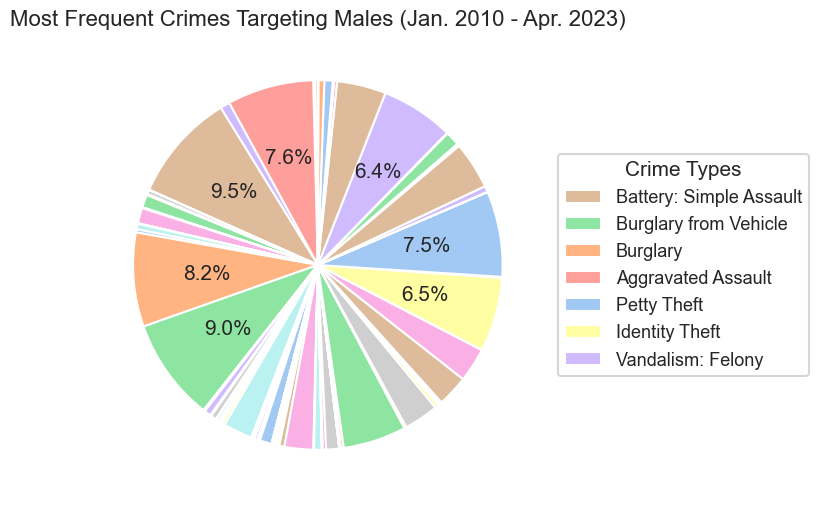

In [14]:
import numpy as np

# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_m = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_m = df_pie_m.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for male victims
if 'M' in grouped_col_m.index:
    counts_m = grouped_col_m.loc['M']

    # customizes the color of the pie chart
    colors_m = sns.color_palette('pastel', len(counts_m))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_m = counts_m.argsort()[::-1]

    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_m, autopct = lambda pct: labeler(pct, counts_m), startangle = 90, colors = colors_m)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_m = [(desc, value) for desc, value in zip(counts_m.index, counts_m) if value/sum(counts_m) > 0.06]

    # renames labels for clarity
    renamed_labels_m = {
        'Assault With Deadly Weapon, Aggravated Assault': 'Aggravated Assault',
        'Battery - Simple Assault': 'Battery: Simple Assault',
        'Burglary': 'Burglary',
        'Burglary From Vehicle': 'Burglary from Vehicle',
        'Theft Of Identity': 'Identity Theft',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Vandalism - Felony ($400 & Over, All Church Vandalisms)': 'Vandalism: Felony'}
    
    # sorts the labels based on counts in descending order
    sorted_necessary_labels_m = sorted(necessary_labels_m, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the label tuples
    labels_for_legend_m = [renamed_labels_m.get(label[0], label[0]) for label in sorted_necessary_labels_m]

    # creates a legend using the labels and pie sizes
    sorted_wedges_m = [wedges[i] for i in sorted_indices_m]
    ax.legend(sorted_wedges_m, labels_for_legend_m, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_m):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Males (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 2.png'), dpi = 300) 
    plt.show()
    
else:
    print('no data is available for male victims')

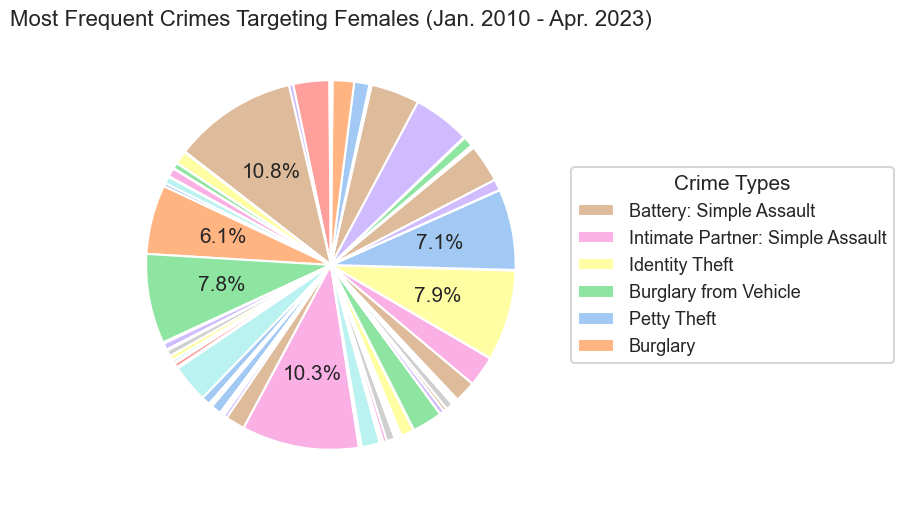

In [15]:
# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_f = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_f = df_pie_f.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for female victims
if 'F' in grouped_col_f.index:
    counts_f = grouped_col_f.loc['F']

    # customizes the color of the pie chart
    colors_f = sns.color_palette('pastel', len(counts_f))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_f = counts_f.argsort()[::-1]
    
    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_f, autopct = lambda pct: labeler(pct, counts_f), startangle = 90, colors = colors_f)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_f = [(desc, value) for desc, value in zip(counts_f.index, counts_f) if value/sum(counts_f) > 0.06]

    # renames labels for clarity
    renamed_labels_f = {
        'Battery - Simple Assault': 'Battery: Simple Assault',
        'Intimate Partner - Simple Assault': 'Intimate Partner: Simple Assault',
        'Theft Of Identity': 'Identity Theft',
        'Burglary From Vehicle': 'Burglary from Vehicle',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Burglary': 'Burglary'}

    # sorts the labels based on counts in descending order
    sorted_necessary_labels_f = sorted(necessary_labels_f, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the sorted label tuples
    labels_for_legend_f = [renamed_labels_f.get(label[0], label[0]) for label in sorted_necessary_labels_f]

    # creates a legend using the labels and pie sizes
    sorted_wedges_f = [wedges[i] for i in sorted_indices_f]
    ax.legend(sorted_wedges_f, labels_for_legend_f, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_f):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Females (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 3.png'), dpi = 300)
    plt.show()
    
else:
    print('no data is available for female victims')

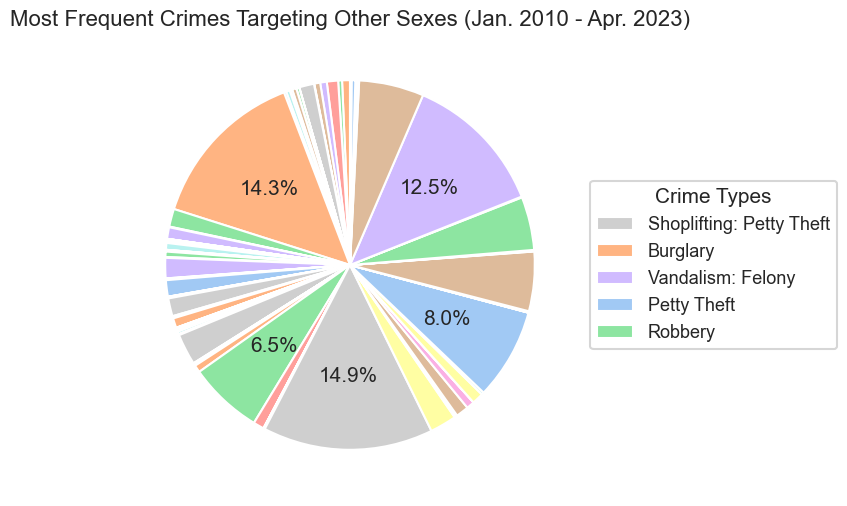

In [16]:
# sets a style and context
sns.set_style('white')
sns.set_context('talk')

# drops rows with NaN values from the desired columns
df_pie_o = df.dropna(subset = ['Vict Sex', 'Crime Code Desc'])

# groups by the sex column and counts occurrences of each crime code
grouped_col_o = df_pie_o.groupby('Vict Sex')['Crime Code Desc'].value_counts().unstack().fillna(0)

# combines rows other than 'M' and 'F' into 'Other' row
grouped_col_o.loc['Other'] = grouped_col_o.loc[~grouped_col_o.index.isin(['M', 'F'])].sum()
grouped_col_o = grouped_col_o[grouped_col_o.index.isin(['M', 'F', 'Other'])]

# formats the labels of the pie chart
def labeler(pct, allvals):
    if pct > 6:
        return "{:.1f}%".format(pct) # only returns percentages above 6%
    return ""

# plots a pie chart of crime for other victims
if 'Other' in grouped_col_o.index:
    counts_o = grouped_col_o.loc['Other']

    # customizes the color of the pie chart
    colors_o = sns.color_palette('pastel', len(counts_o))

    # initializes the figure and axis
    fig, ax = plt.subplots(figsize = (10, 6))

    # gets indices that sort the counts in descending order
    sorted_indices_o = counts_o.argsort()[::-1]
    
    # plots the chart
    wedges, texts, autotexts = ax.pie(counts_o, autopct = lambda pct: labeler(pct, counts_o), startangle = 90, colors = colors_o)

    # adjusts the font size for the percentage labels on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    # retrieves labels for crimes with a proportion above 6%
    necessary_labels_o = [(desc, value) for desc, value in zip(counts_f.index, counts_o) if value/sum(counts_o) > 0.06]

    # renames labels for clarity
    renamed_labels_o = {
        'Shoplifting - Petty Theft ($950 & Under)': 'Shoplifting: Petty Theft',
        'Burglary': 'Burglary',
        'Vandalism - Felony ($400 & Over, All Church Vandalisms)': 'Vandalism: Felony',
        'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
        'Robbery': 'Robbery'}

    # sorts the labels based on counts in descending order
    sorted_necessary_labels_o = sorted(necessary_labels_o, key = lambda x: x[1], reverse = True)
    
    # extracts the descriptions from the sorted label tuples
    labels_for_legend_o = [renamed_labels_o.get(label[0], label[0]) for label in sorted_necessary_labels_o]

    # creates a legend using the labels and pie sizes
    sorted_wedges_o = [wedges[i] for i in sorted_indices_o]
    ax.legend(sorted_wedges_o, labels_for_legend_o, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 13).get_title().set_fontsize('15')

    # sets labels for the wedges in the pie chart
    for w, t in zip(wedges, labels_for_legend_o):
        w.set_label(t)
    
    ax.set_ylabel('')
    ax.set_title('Most Frequent Crimes Targeting Other Sexes (Jan. 2010 - Apr. 2023)', fontsize = 16)
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 4.png'), dpi = 300)
    plt.show()
    
else:
    print('no data is available for other victims')

#### Visualizing the relationship between geographic area and crime

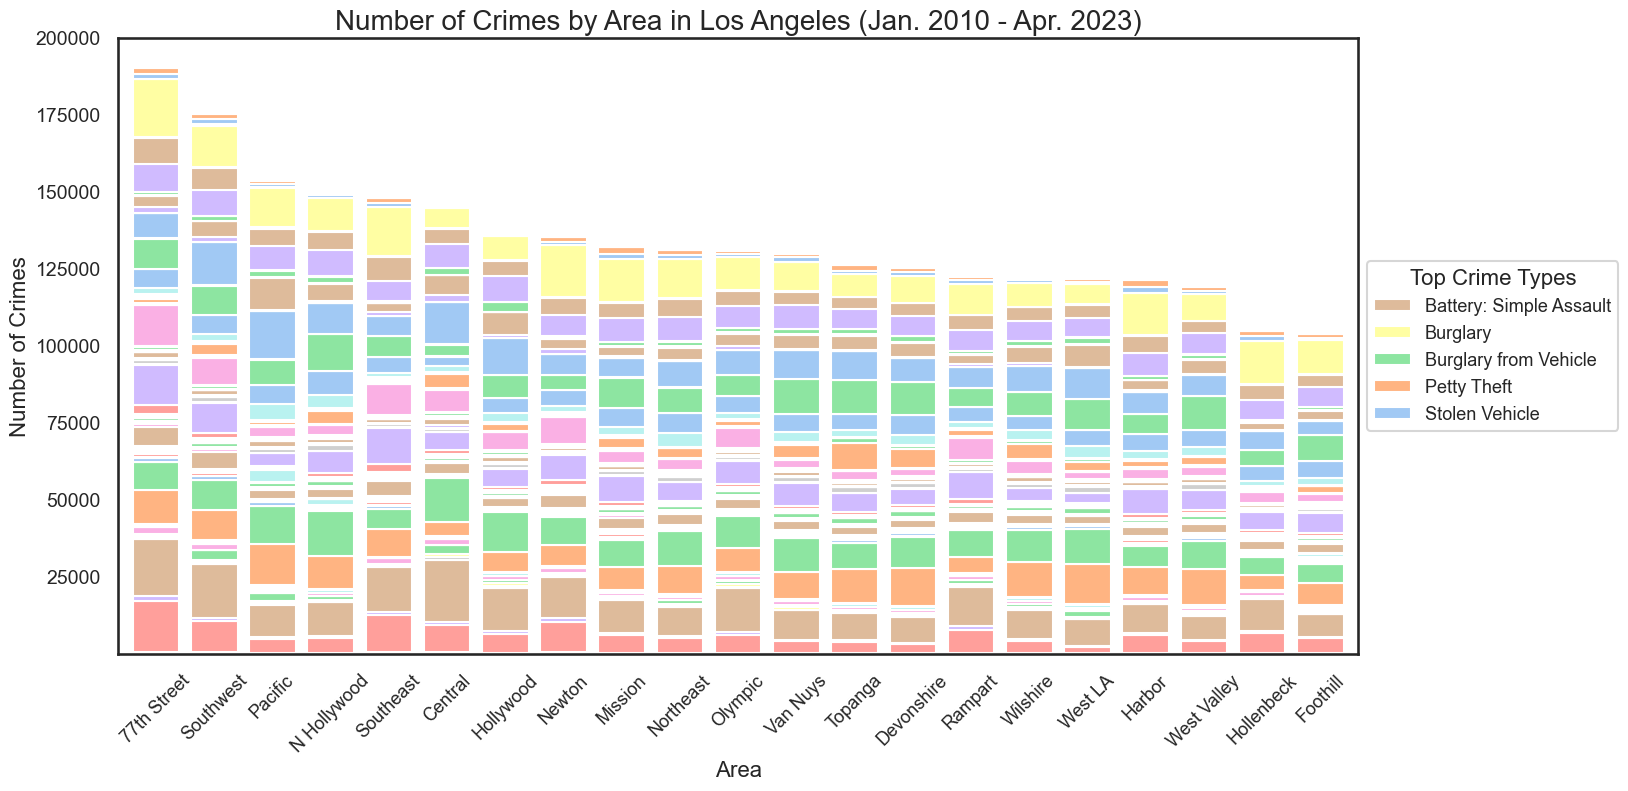

In [17]:
# sets a color palette for the bars
sns.set_palette('pastel', 24)

# aggregates the data to get the count of crime type for each area
agg_data = df.groupby(['Area Name', 'Crime Code Desc']).size().unstack().fillna(0)

# calculates the sum of crimes for each area
agg_data['total_crimes'] = agg_data.sum(axis = 1)

# sorts the areas in decreasing order by total crimes
agg_data = agg_data.sort_values(by = 'total_crimes', ascending = False).drop(columns = ['total_crimes'])

# determines the top 5 crimes across all areas
top_5_crimes = agg_data.sum().nlargest(5).index

# plots a stacked bar chart using all the crime types
ax = agg_data.plot(kind = 'bar', stacked = True, figsize = (16, 8), width = 0.8)

# instantiates a legend that shows the top 5 crime types
handles, labels = ax.get_legend_handles_labels()
filtered_handles = [handles[labels.index(crime)] for crime in top_5_crimes if crime in labels]
filtered_labels = [label for label in labels if label in top_5_crimes]

# creates a dictionary to update the crime type names
crime_names = {
    'Battery - Simple Assault': 'Battery: Simple Assault',
    'Burglary': 'Burglary',
    'Burglary From Vehicle': 'Burglary from Vehicle',
    'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
    'Vehicle - Stolen': 'Stolen Vehicle'}

# uses the dictionary to update the legend
renamed_labels = [crime_names.get(label, label) for label in filtered_labels]
ax.legend(filtered_handles, renamed_labels, title = 'Top Crime Types', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 13).get_title().set_fontsize('16')

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 14)

plt.title('Number of Crimes by Area in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.xlabel('Area', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 5.png'), dpi = 300)
plt.show()

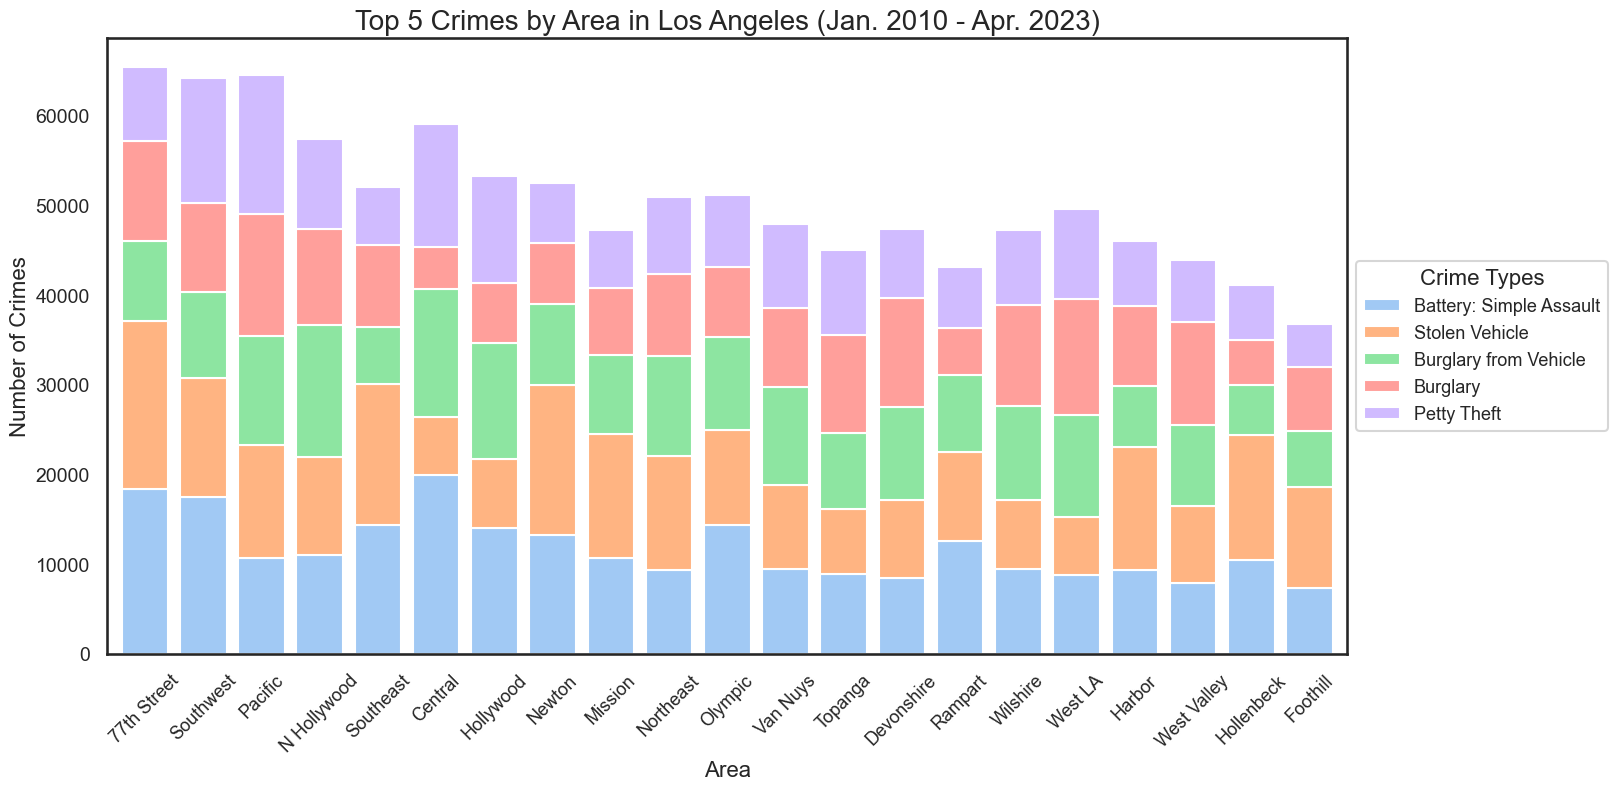

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# sets a color palette for the bars
sns.set_palette('pastel', 5)

# aggregates the data to get the count of crime type for each area
agg_data = df.groupby(['Area Name', 'Crime Code Desc']).size().unstack().fillna(0)

# calculates the sum of crimes for each area
agg_data['total_crimes'] = agg_data.sum(axis = 1)

# determines the top 5 crimes across all areas
top_5_crimes = agg_data.drop(columns = ['total_crimes']).sum().nlargest(5).index

# sorts the areas in decreasing order by total crimes
sorted_agg_data = agg_data.sort_values(by = 'total_crimes', ascending = False)

# filters to only keep the top 5 crimes
filtered_agg_data = sorted_agg_data[top_5_crimes]

# plots a stacked bar chart using the top 5 crime types
ax = filtered_agg_data.plot(kind = 'bar', stacked = True, figsize = (16, 8), width = 0.8)

# instantiates a legend that shows the top 5 crime types
handles, labels = ax.get_legend_handles_labels()
filtered_handles = [handles[labels.index(crime)] for crime in top_5_crimes]
filtered_labels = [label for label in top_5_crimes]

# creates a dictionary to update the crime type names
crime_names = {
    'Battery - Simple Assault': 'Battery: Simple Assault',
    'Burglary': 'Burglary',
    'Burglary From Vehicle': 'Burglary from Vehicle',
    'Theft Plain - Petty ($950 & Under)': 'Petty Theft',
    'Vehicle - Stolen': 'Stolen Vehicle'}

# uses the dictionary to update the legend
renamed_labels = [crime_names.get(label, label) for label in filtered_labels]
ax.legend(filtered_handles, renamed_labels, title = 'Crime Types', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 13).get_title().set_fontsize('16')

plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 14)

plt.title('Top 5 Crimes by Area in Los Angeles (Jan. 2010 - Apr. 2023)', fontsize = 20)
plt.xlabel('Area', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 6.png'), dpi = 300)
plt.show()

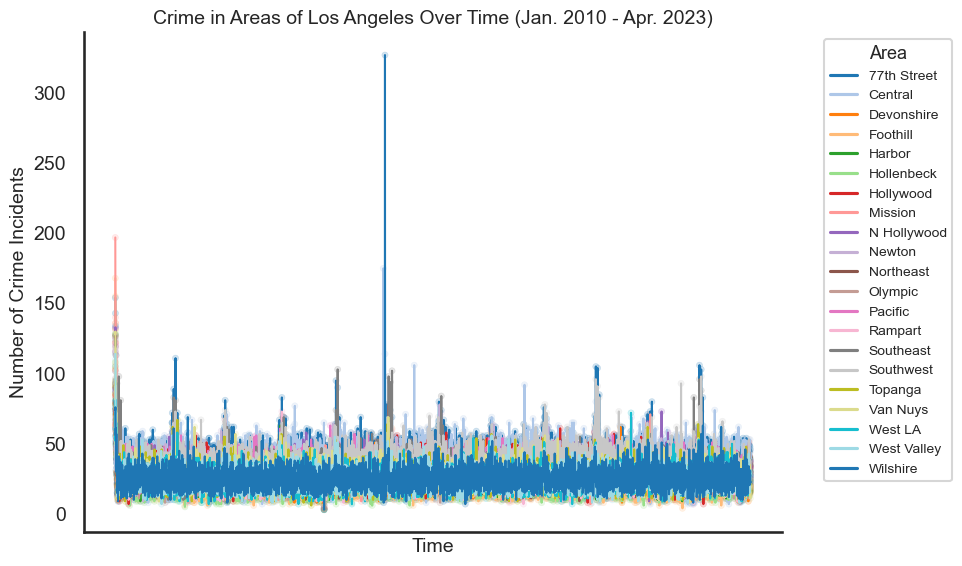

In [19]:
# groups by date and area and then count the number of incidents
date_area_grouped = df.groupby(['Date Occurred', 'Area Name']).size().reset_index(name = 'Incidents Count')

# creates a scatter plot
plt.figure(figsize = (10, 6))
sns.scatterplot(data = date_area_grouped, y = 'Incidents Count', x = 'Date Occurred', hue = 'Area Name', palette = 'tab20', alpha = 0.2, edgecolor = None, s = 20, legend = False)

# adds trend lines for each area
sns.lineplot(data = date_area_grouped, y = 'Incidents Count', x = 'Date Occurred', hue = 'Area Name', palette = 'tab20', lw = 1.5, estimator = None)

# instantiates a legend outside the plot
plt.legend(title = 'Area', bbox_to_anchor = (1.05, 1), loc = 'upper left', fontsize = 10).get_title().set_fontsize('13')

# sets date formatting on the x-axis for better readability
plt.xticks([])
plt.yticks(fontsize = 14)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d, %Y'))

# removes top and right spines
sns.despine()

plt.title('Crime in Areas of Los Angeles Over Time (Jan. 2010 - Apr. 2023)', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Number of Crime Incidents', fontsize = 14)
plt.tight_layout()
plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/figures', 'Figure 7.png'), dpi = 300)
plt.show()

### Part 3: Data Cleaning and Preprocessing

#### Handling missing values in the data

In [20]:
# counts NaN values in each column of the dataframe
na_counts = df.isna().sum()
print(na_counts)

Record ID                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area                      0
Area Name                 0
Report Dist No            0
Part 1-2                  0
Crime Code                0
Crime Code Desc           0
Mocodes              325563
Vict Age                  0
Vict Sex             289408
Vict Race            289460
Premise Code             61
Premise Desc            572
Weapon Used Code    1869579
Weapon Desc         1869580
Status                    3
Status Desc               0
Crime Code 1             19
Crime Code 2        2634640
Crime Code 3        2822566
Crime Code 4        2827722
Location                  0
Cross Street        2357662
Latitude                  0
Longitude                 0
dtype: int64


In [21]:
# calculates the prominence of missing values
print('Data Dimensions:', df.shape)
perc_missing_per_ftr = df.isnull().sum(axis = 0)/df.shape[0]
print('Fraction of Missing Values in Features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
frac_missing = sum(df.isnull().sum(axis = 1) != 0)/df.shape[0]
print('Fraction of Points with Missing Values:', frac_missing)
features_with_missing = df.isnull().sum() > 0
frac_features_missing = features_with_missing.sum()/len(df.columns)
print('Fraction of Features with Missing Values:', frac_features_missing)

Data Dimensions: (2827881, 28)
Fraction of Missing Values in Features:
Mocodes             0.115126
Vict Sex            0.102341
Vict Race           0.102359
Premise Code        0.000022
Premise Desc        0.000202
Weapon Used Code    0.661124
Weapon Desc         0.661124
Status              0.000001
Crime Code 1        0.000007
Crime Code 2        0.931666
Crime Code 3        0.998121
Crime Code 4        0.999944
Cross Street        0.833720
dtype: float64
Fraction of Points with Missing Values: 0.9999897449715882
Fraction of Features with Missing Values: 0.4642857142857143


In [22]:
# drops columns that are not important to our analysis
df2 = df.drop(columns = ['Record ID', 'Date Reported', 'Time Occurred', 'Area', 'Report Dist No', 'Part 1-2', 'Crime Code', 'Mocodes', 
                         'Premise Code', 'Premise Desc', 'Weapon Used Code', 'Status', 'Status Desc', 'Crime Code 1', 'Crime Code 2', 
                         'Crime Code 3', 'Crime Code 4', 'Location', 'Cross Street', 'Latitude', 'Longitude'])

In [23]:
# drops rows with missing values for columns that only have a few missing values
df2 = df2.dropna(subset = ['Vict Sex'])
df2 = df2.dropna(subset = ['Vict Race'])

In [24]:
# counts NaN values in the modified dataframe
cleaned_na_counts = df2.isna().sum()
print(cleaned_na_counts)

Date Occurred            0
Area Name                0
Crime Code Desc          0
Vict Age                 0
Vict Sex                 0
Vict Race                0
Weapon Desc        1580424
dtype: int64


#### Cleaning values in the columns

In [25]:
# checks the values of the Date Occurred column
df2['Date Occurred'].value_counts()

Date Occurred
01/01/2010 12:00:00 AM    2233
01/01/2011 12:00:00 AM    2186
01/01/2012 12:00:00 AM    1810
01/01/2013 12:00:00 AM    1644
01/01/2014 12:00:00 AM    1553
                          ... 
04/09/2020 12:00:00 AM     348
02/09/2013 12:00:00 AM     340
04/22/2023 12:00:00 AM     328
04/23/2023 12:00:00 AM     278
04/24/2023 12:00:00 AM      51
Name: count, Length: 4862, dtype: int64

In [26]:
# ensures the Date Occurred column is in datetime format
df2['Date Occurred'] = pd.to_datetime(df2['Date Occurred'], format = '%m/%d/%Y %I:%M:%S %p')

# removes the time data from the Date Occurred column
df2['Date Occurred'] = df2['Date Occurred'].dt.date

In [27]:
# checks the values of the Area Name column to ensure no modifications are needed
df2['Area Name'].value_counts()

Area Name
77th Street    168719
Southwest      158995
Central        138198
N Hollywood    135607
Pacific        135526
Southeast      129476
Hollywood      127578
Van Nuys       118194
Olympic        117880
Topanga        117182
Northeast      115869
Newton         115754
Mission        115501
Devonshire     114106
West LA        113582
Wilshire       112527
Rampart        110206
West Valley    108844
Harbor         105781
Foothill        90397
Hollenbeck      88492
Name: count, dtype: int64

In [28]:
# checks the values of the Crime Code Desc column to ensure no modifications are needed
df2['Crime Code Desc'].value_counts()

Crime Code Desc
Battery - Simple Assault                                   246372
Burglary From Vehicle                                      206292
Burglary                                                   190805
Theft Plain - Petty ($950 & Under)                         186055
Theft Of Identity                                          174988
                                                            ...  
Till Tap - Attempt                                              4
Firearms Emergency Protective Order (Firearms Epo)              4
Train Wrecking                                                  2
Firearms Temporary Restraining Order (Temp Firearms Ro)         1
Drunk Roll - Attempt                                            1
Name: count, Length: 144, dtype: int64

In [29]:
# checks the values of the Vict Age column
df2['Vict Age'].value_counts()

Vict Age
 0     252802
 25     62143
 28     61853
 27     61812
 26     61765
        ...  
-7         19
-9         11
-8          9
-10         2
-11         1
Name: count, Length: 110, dtype: int64

In [30]:
# drops rows with ages below 1 from the Vict Age column
df2 = df2[df2['Vict Age'] >= 1]

In [31]:
# checks the values of the Vict Sex column
df2['Vict Sex'].value_counts()

Vict Sex
F    1137771
M    1134672
X      12285
H        149
N         16
-          1
Name: count, dtype: int64

In [32]:
# removes missing values from the Vict Sex column
df2 = df2[~df2['Vict Sex'].isin(['-'])]

# replaces the X, H, and N sexes with O
df2['Vict Sex'] = df2['Vict Sex'].replace(['X', 'H', 'N'], 'O')

In [33]:
# checks the values of the Vict Race column
df2['Vict Race'].value_counts()

Vict Race
H    920089
W    603573
B    431050
O    212041
A     65347
X     25871
K     12346
F      5449
C      3652
I      1593
J      1386
V       902
P       526
Z       473
U       266
G       130
D        70
S        65
L        61
-         3
Name: count, dtype: int64

In [34]:
# removes missing values from the Vict Race column
df2 = df2[~df2['Vict Race'].isin(['-'])]

In [35]:
# checks the values of the Weapon Desc column
df2['Weapon Desc'].value_counts()

Weapon Desc
Strong-Arm (Hands, Fist, Feet Or Bodily Force)    542699
Unknown Weapon/Other Weapon                        75229
Verbal Threat                                      73185
Hand Gun                                           43636
Knife With Blade 6Inches Or Less                   17097
                                                   ...  
Antique Firearm                                       14
Mac-10 Semiautomatic Assault Weapon                   13
Mac-11 Semiautomatic Assault Weapon                   10
M1-1 Semiautomatic Assault Rifle                       4
M-14 Semiautomatic Assault Rifle                       2
Name: count, Length: 79, dtype: int64

In [36]:
# assigns a 0 indicator to rows with missing values, else 1
df2['Weapon Desc'] = df2['Weapon Desc'].isna().astype(int).replace({0: 1, 1: 0})

In [37]:
# counts NaN values in each column of the dataframe after cleaning
final_na_counts = df2.isna().sum()
print(final_na_counts)

Date Occurred      0
Area Name          0
Crime Code Desc    0
Vict Age           0
Vict Sex           0
Vict Race          0
Weapon Desc        0
dtype: int64


In [38]:
# resets the index
df2.reset_index(drop = True, inplace = True)

# checks the head and shape of the cleaned dataframe
print(df2.shape)
df2.head()

(2284890, 7)


,Date Occurred,Area Name,Crime Code Desc,Vict Age,Vict Sex,Vict Race,Weapon Desc
0,2010-02-20,Newton,Violation Of Court Order,48,M,H,0
1,2010-01-05,Hollywood,Violation Of Court Order,47,F,W,1
2,2010-01-02,Central,"Rape, Attempted",47,F,H,1
3,2010-01-04,Central,Shoplifting - Petty Theft ($950 & Under),23,M,B,0
4,2010-01-07,Central,Burglary From Vehicle,46,M,H,0


In [39]:
# calculates the top 15 most common crimes
most_common_crimes = df['Crime Code Desc'].value_counts().nlargest(15).index

# filters the dataframe to only include the most common crimes
df3 = pd.DataFrame(df2[df2['Crime Code Desc'].isin(most_common_crimes)])

# drops the Crime Code Desc column as it is no longer necessary
df3 = df3.drop(columns = 'Crime Code Desc')

# resets the index
df3.reset_index(drop = True, inplace = True)

# checks the head and shape of the shorter dataframe to see if it is ready for analysis
print(df3.shape)
df3.head()

(1781603, 6)


,Date Occurred,Area Name,Vict Age,Vict Sex,Vict Race,Weapon Desc
0,2010-01-04,Central,23,M,B,0
1,2010-01-07,Central,46,M,H,0
2,2010-01-08,Central,51,M,B,1
3,2010-01-09,Central,30,M,H,1
4,2010-01-06,Central,55,M,W,0


#### Preprocessing the data

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# defines the feature types
cat_ftrs = ['Area Name', 'Vict Sex', 'Vict Race']
no_transform_col = ['Date Occurred', 'Vict Age', 'Weapon Desc']

# creates the one-hot encoder transformer
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))])

# assembles the full preprocessor
preprocessor = ColumnTransformer(transformers = [('cat', categorical_transformer, cat_ftrs)])

# transforms the whole dataframe
df_prep = preprocessor.fit_transform(df3.drop(columns = no_transform_col))

# retrieves the feature names post-transformation
feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_ftrs))

# converts the preprocessed data back to a dataframe
df_prep = pd.DataFrame(data = df_prep, columns = feature_names)

# adds the non-transformed features back to the dataframe
for feature in no_transform_col:
    df_prep[feature] = df3[feature].values

# specifies the new column order
new_col_order = ['Date Occurred', 'Vict Age', 'Weapon Desc', 'Area Name_77th Street', 'Area Name_Central', 'Area Name_Devonshire', 
                 'Area Name_Foothill', 'Area Name_Harbor', 'Area Name_Hollenbeck', 'Area Name_Hollywood', 'Area Name_Mission', 
                 'Area Name_N Hollywood', 'Area Name_Newton', 'Area Name_Northeast', 'Area Name_Olympic', 'Area Name_Pacific', 
                 'Area Name_Rampart', 'Area Name_Southeast', 'Area Name_Southwest', 'Area Name_Topanga', 'Area Name_Van Nuys',
                 'Area Name_West LA', 'Area Name_West Valley', 'Area Name_Wilshire', 'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_O', 
                 'Vict Race_A', 'Vict Race_B', 'Vict Race_C', 'Vict Race_D', 'Vict Race_F', 'Vict Race_G', 'Vict Race_H', 'Vict Race_I', 
                 'Vict Race_J', 'Vict Race_K', 'Vict Race_L', 'Vict Race_O', 'Vict Race_P', 'Vict Race_S', 'Vict Race_U', 'Vict Race_V', 
                 'Vict Race_W', 'Vict Race_X', 'Vict Race_Z']

# rearranges the columns
df_prep = df_prep[new_col_order]

print(df_prep.columns)
print(df_prep.shape)

Index(['Date Occurred', 'Vict Age', 'Weapon Desc', 'Area Name_77th Street',
       'Area Name_Central', 'Area Name_Devonshire', 'Area Name_Foothill',
       'Area Name_Harbor', 'Area Name_Hollenbeck', 'Area Name_Hollywood',
       'Area Name_Mission', 'Area Name_N Hollywood', 'Area Name_Newton',
       'Area Name_Northeast', 'Area Name_Olympic', 'Area Name_Pacific',
       'Area Name_Rampart', 'Area Name_Southeast', 'Area Name_Southwest',
       'Area Name_Topanga', 'Area Name_Van Nuys', 'Area Name_West LA',
       'Area Name_West Valley', 'Area Name_Wilshire', 'Vict Sex_F',
       'Vict Sex_M', 'Vict Sex_O', 'Vict Race_A', 'Vict Race_B', 'Vict Race_C',
       'Vict Race_D', 'Vict Race_F', 'Vict Race_G', 'Vict Race_H',
       'Vict Race_I', 'Vict Race_J', 'Vict Race_K', 'Vict Race_L',
       'Vict Race_O', 'Vict Race_P', 'Vict Race_S', 'Vict Race_U',
       'Vict Race_V', 'Vict Race_W', 'Vict Race_X', 'Vict Race_Z'],
      dtype='object')
(1781603, 46)


### Part 4: Lag Counts

#### Aggregating the data

In [41]:
# defines a function to aggregate the data by an inputted time period
def data_aggregator(df, period):
    # sets the date as the index
    df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])
    df.set_index('Date Occurred', inplace = True)

    # defines the aggregation dictionary
    agg_dict = {'Vict Age': 'mean'}
    agg_dict.update({col: 'sum' for col in df.columns if col not in ['Date Occurred', 'Vict Age']})

    # groups the data by the specified time period
    df_agg = df.resample(period).agg(agg_dict)

    # counts the total number of crimes in each period
    df_agg['Total Crimes'] = df['Vict Age'].resample(period).size()

    # resets the index to get the date as the column
    df_agg.reset_index(inplace = True)

    # reformats the 'Date Occurred' column to show the period
    df_agg['Date Occurred'] = df_agg['Date Occurred'].dt.to_period(period[0])

    # moves the 'Total Crimes' column to be the second in the dataframe
    cols = ['Date Occurred', 'Total Crimes'] + [col for col in df_agg.columns if col not in ['Date Occurred', 'Total Crimes']]
    df_agg = df_agg[cols]

    return df_agg

# aggregates the data at the daily level
df_d = data_aggregator(df_prep.copy(), 'D')

# aggregates the data at the weekly level
df_w = data_aggregator(df_prep.copy(), 'W')

# aggregates the data at the monthly level
df_m = data_aggregator(df_prep.copy(), 'M')

# aggregates the data at the quarterly level
df_q = data_aggregator(df_prep.copy(), 'Q')

# checks the sizes of the dataframes
print('Daily Aggregated Data Shape:', df_d.shape, '/ Total Crimes:', df_d['Total Crimes'].sum())
print('Weekly Aggregated Data Shape:', df_w.shape, '/ Total Crimes:', df_w['Total Crimes'].sum())
print('Monthly Aggregated Data Shape:', df_m.shape, '/ Total Crimes:', df_m['Total Crimes'].sum())
print('Quarterly Aggregated Data Shape:', df_q.shape, '/ Total Crimes:', df_q['Total Crimes'].sum())

Daily Aggregated Data Shape: (4862, 47) / Total Crimes: 1781603
Weekly Aggregated Data Shape: (696, 47) / Total Crimes: 1781603
Monthly Aggregated Data Shape: (160, 47) / Total Crimes: 1781603
Quarterly Aggregated Data Shape: (54, 47) / Total Crimes: 1781603


#### Evaluating lag counts

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# sets a style
sns.set_style('darkgrid')

# defines a function to create autocorrelation plots and autoregressive models
def analyze_time_series(data, time_series_column, title, num_lags, figure_number):
    # extracts the time-series data
    time_series_data = data[time_series_column]

    # creates an autocorrelation plot
    fig, ax = plt.subplots(figsize = (10.2, 5.1))
    sm.graphics.tsa.plot_acf(time_series_data, lags = num_lags, ax = ax)
    plt.title(f'Autocorrelation Plot: {title}', fontsize = 16)
    plt.xlabel('Lags', fontsize = 14)
    plt.ylabel('Autocorrelation', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', f'Figure {figure_number}.png'), dpi = 300)
    plt.show()
    
    # fits an autoregressive model
    model = AutoReg(time_series_data, lags = num_lags, old_names = False)
    results = model.fit()
    print(f'{title} - Autoregressive Model Summary:')
    print(results.summary())

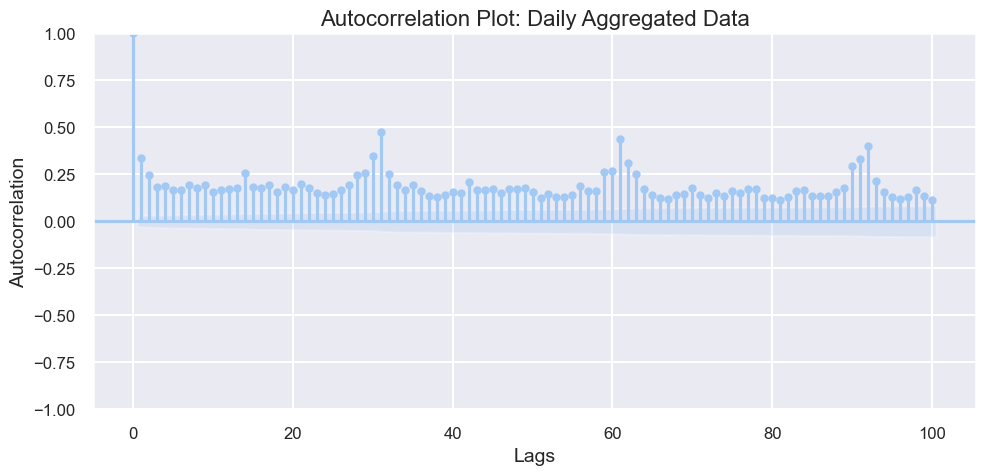

Daily Aggregated Data - Autoregressive Model Summary:
                            AutoReg Model Results                             
Dep. Variable:           Total Crimes   No. Observations:                 4862
Model:                   AutoReg(100)   Log Likelihood              -24877.080
Method:               Conditional MLE   S.D. of innovations             44.932
Date:                Sun, 10 Dec 2023   AIC                          49958.160
Time:                        19:07:06   BIC                          50617.939
Sample:                           100   HQIC                         50189.974
                                 4862                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.8416      8.734      1.241      0.214      -6.277      27.960
Total Crimes.L1       0.0929      0.015      6.395      

In [43]:
# analyzes the data aggregated at the daily level
analyze_time_series(df_d, 'Total Crimes', 'Daily Aggregated Data', num_lags = 100, figure_number = 1)

In [44]:
from statsmodels.tsa.stattools import adfuller

# defines a function that uses differencing to make a time series stationary
def to_stationary(df, column, max_diff_order = 3):
    for i in range(1, max_diff_order + 1):
        # applies differencing to the data
        df[f'diff_{i}'] = df[column].diff(i)

        # drops any missing values from differencing
        df = df.dropna()

        # checks if the time series is stationary
        if is_stationary(df, f'diff_{i}'):
            return df, i

    print('Error: unable to make the time series stationary via differencing')
    return df, -1

# defines a function that checks if a time series is stationary via ADF test
def is_stationary(df, column):
    adf_result = adfuller(df[column])
    print(f'ADF Statistic for {column}: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    for key, value in adf_result[4].items():
        print(f'Critical Value {key}: {value}')
    if adf_result[1] < 0.05:
        print(f"Check: the {column} series is stationary")
        return True
    else:
        print(f"Error: the {column} series is still non-stationary")
        return False

# makes the 'Total Crimes' column stationary
df_w, diff_order = to_stationary(df_w, 'Total Crimes')
if diff_order != -1:
    print(f"Check: series made stationary with {diff_order} order differencing")

ADF Statistic for diff_1: -3.7993743063199603
p-value: 0.002913723149190029
Critical Value 1%: -3.4400894360545475
Critical Value 5%: -2.865837730028723
Critical Value 10%: -2.5690586760471605
Check: the diff_1 series is stationary
Check: series made stationary with 1 order differencing


In [45]:
# removes rows with missing values from the weekly aggregated data
df_w = df_w.dropna()

# drops the last row of the dataframe since the data is incomplete
df_w.drop(df_w.index[-1], inplace = True)

# replaces the 'Total Crimes' column with the stationary time series
df_w['Total Crimes'] = df_w['diff_1']
df_w.drop(columns = ['diff_1'], inplace = True)

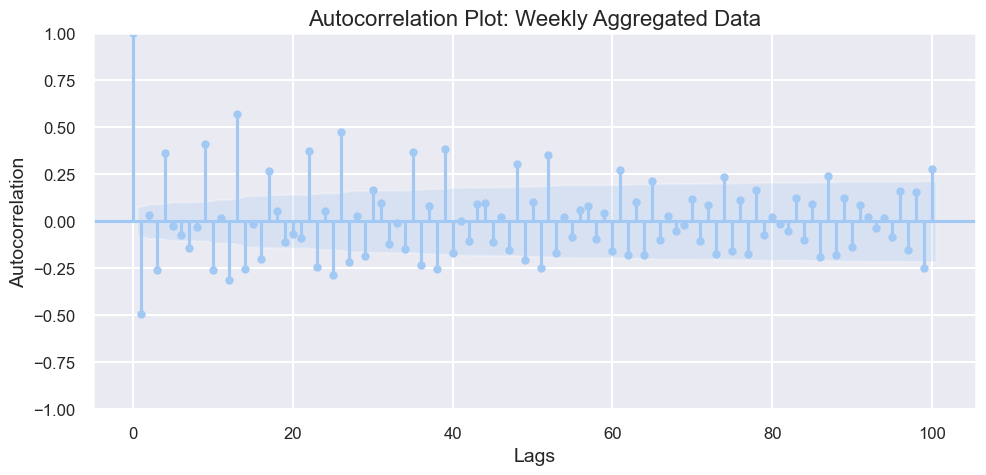

Weekly Aggregated Data - Autoregressive Model Summary:
                            AutoReg Model Results                             
Dep. Variable:           Total Crimes   No. Observations:                  694
Model:                   AutoReg(100)   Log Likelihood               -3676.228
Method:               Conditional MLE   S.D. of innovations            117.919
Date:                Sun, 10 Dec 2023   AIC                           7556.457
Time:                        19:07:07   BIC                           8003.919
Sample:                           100   HQIC                          7730.723
                                  694                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.3326      4.919     -1.287      0.198     -15.973       3.308
Total Crimes.L1      -0.7309      0.041    -17.799     

An unsupported index was provided and will be ignored when e.g. forecasting.


In [46]:
# analyzes the data aggregated at the weekly level
analyze_time_series(df_w, 'Total Crimes', 'Weekly Aggregated Data', num_lags = 100, figure_number = 2)

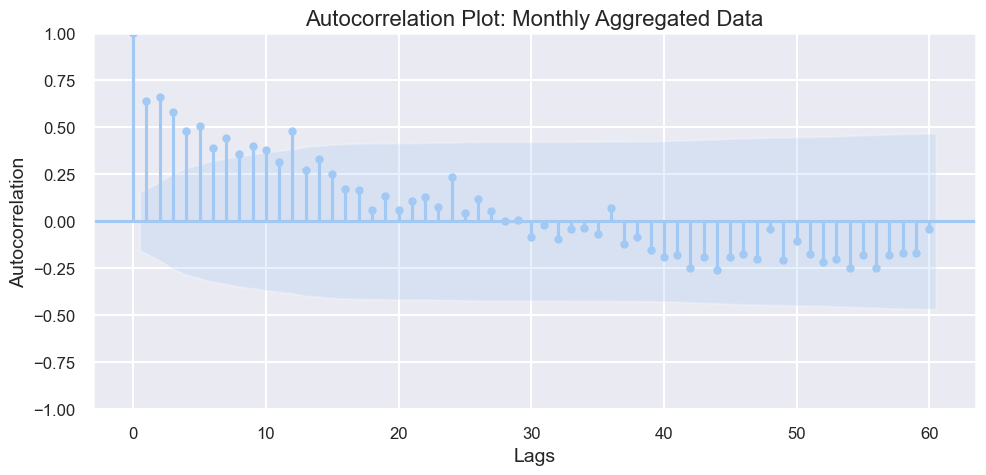

Monthly Aggregated Data - Autoregressive Model Summary:
                            AutoReg Model Results                             
Dep. Variable:           Total Crimes   No. Observations:                  160
Model:                    AutoReg(60)   Log Likelihood                -710.496
Method:               Conditional MLE   S.D. of innovations            294.718
Date:                Sun, 10 Dec 2023   AIC                           1544.991
Time:                        19:07:07   BIC                           1706.512
Sample:                            60   HQIC                          1610.361
                                  160                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3282.5196   3708.272      0.885      0.376   -3985.560    1.06e+04
Total Crimes.L1      1.0177      0.111      9.176      0.

In [47]:
# analyzes the data aggregated at the monthly level
analyze_time_series(df_m, 'Total Crimes', 'Monthly Aggregated Data', num_lags = 60, figure_number = 3)

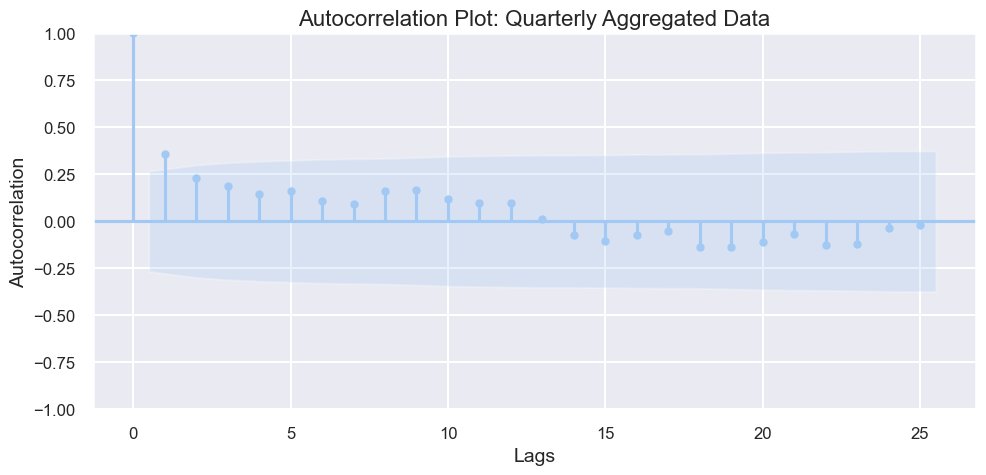

Quarterly Aggregated Data - Autoregressive Model Summary:
                            AutoReg Model Results                             
Dep. Variable:           Total Crimes   No. Observations:                   54
Model:                    AutoReg(25)   Log Likelihood                -231.936
Method:               Conditional MLE   S.D. of innovations            719.703
Date:                Sun, 10 Dec 2023   AIC                            517.871
Time:                        19:07:08   BIC                            554.788
Sample:                            25   HQIC                           529.433
                                   54                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.684e+05   5.63e+04     -4.765      0.000   -3.79e+05   -1.58e+05
Total Crimes.L1      0.6587      0.259      2.543      

In [48]:
# analyzes the data aggregated at the quarterly level
analyze_time_series(df_q, 'Total Crimes', 'Quarterly Aggregated Data', num_lags = 25, figure_number = 4)

In [49]:
def add_lag_features(df):
    # creates a copy of the dataframe
    df = df.copy()
    
    # adds lag columns for the previous 1 to 4 weeks
    for lag in range(1, 5):
        df.insert(loc = lag + 1, column = f'Total Crimes.L{lag}', value = df['Total Crimes'].shift(lag))
        
    # removes rows with missing values in the lag columns
    df.dropna(subset = [f'Total Crimes.L{lag}' for lag in range(1, 5)], inplace = True)
    
    return df

# adds lag features to the dataframe
df4 = add_lag_features(df_w)

print(df4.shape)

(690, 51)


### Part 5: Regression Models

#### Calculating the baseline score

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculates the mean of the 'Total Crimes' target variable
crime_values = df4['Total Crimes']
mean_crimes = crime_values.mean()

# creates an array of the mean values
mean_predictions = np.full_like(crime_values, mean_crimes)

# computes the RMSE using the actual values and the mean predictions
baseline_rmse = sqrt(mean_squared_error(crime_values, mean_predictions))

print(f'Baseline RMSE: {baseline_rmse}')

Baseline RMSE: 236.7138491267674


#### Fitting the linear regression model

In [51]:
from sklearn.preprocessing import StandardScaler

# defines the feature types
num_ftrs = ['Vict Age']
no_transform_col = [col for col in df4.columns if col not in num_ftrs]

# creates the standard scaler transformer
numerical_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# assembles the full preprocessor
preprocessor = ColumnTransformer(transformers = [('num', numerical_transformer, num_ftrs)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


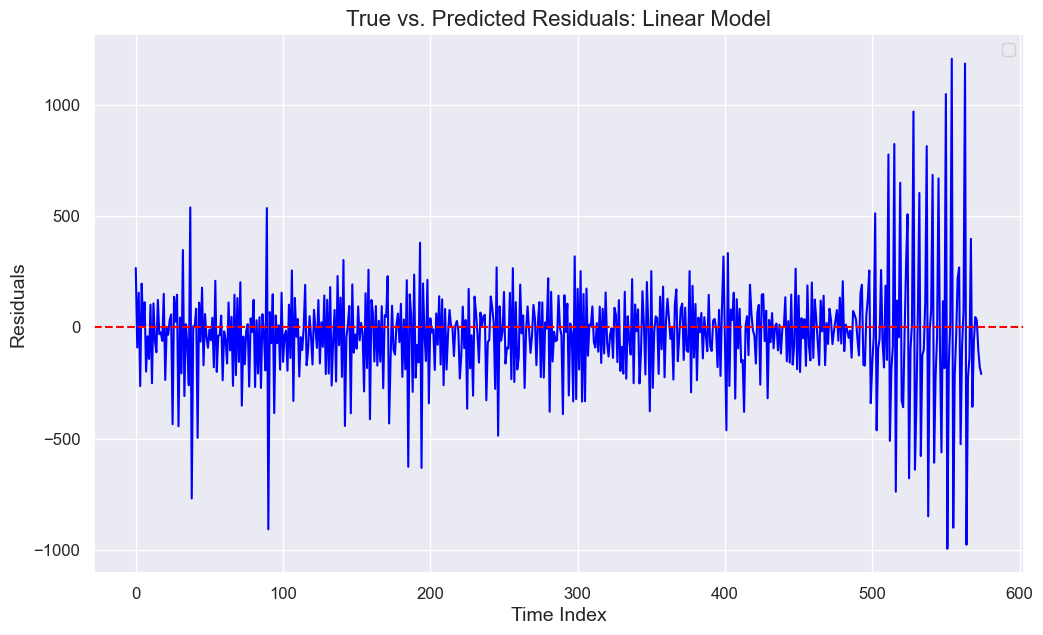

Test Scores: [210.8737211717959, 190.24385889618617, 165.72402707926884, 156.9335949397303, 393.69895635829505]
Mean of Test Scores: 223.49483168905527
Standard Deviation of Test Scores: 87.18053427187162
Standard Deviations above Baseline: 0.15162808473378647


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

# defines a function that fits a linear regression model
def MLpipe_TimeSeries_CV_Linear(X, y, preprocessor, figure_number, n_splits = 5):
    # instantiates lists to store test scores, best models, and residuals for each fold
    test_scores = []
    best_models = []
    residuals = []

    # initializes a TimeSeriesSplit with 5 splits
    tscv = TimeSeriesSplit(n_splits = n_splits)

    # iterates over each fold
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # creates a pipeline with the preprocessor and a linear regression model
        pipe = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', LinearRegression())])
        pipe.fit(X_train, y_train)

        # makes predictions on the test set
        y_pred = pipe.predict(X_test)

        # calculates and stores the RMSE for this fold
        test_score = mean_squared_error(y_test, y_pred, squared = False)
        test_scores.append(test_score)

        # stores the best model for this fold
        best_models.append(pipe)

        # calculates and stores the residuals
        residuals.extend(y_test - y_pred)

    # plots the residuals
    plt.figure(figsize = (12, 7))
    sns.set(style = 'darkgrid')
    plt.plot(residuals, color = 'blue', linewidth = 1.5)
    plt.axhline(y = 0, color = 'red', linestyle = '--')
    plt.xlabel('Time Index', fontsize = 14)
    plt.ylabel('Residuals', fontsize = 14)
    plt.title(f'True vs. Predicted Residuals: Linear Model', fontsize = 16)
    plt.legend(fontsize = 12)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', f'Figure {figure_number}.png'), dpi = 300)
    plt.show()

    # calculates the mean and standard deviation of the test scores
    mean_test_score = np.mean(test_scores)
    std_test_score = np.std(test_scores)

    print(f'Test Scores: {test_scores}')
    print(f'Mean of Test Scores: {mean_test_score}')
    print(f'Standard Deviation of Test Scores: {std_test_score}')
    
    return test_scores, mean_test_score, std_test_score, best_models, residuals

# initializes linear regression
X = df4.drop(columns = ['Total Crimes'])
y = df4['Total Crimes']
test_scores_linear, mean_linear, std_linear, best_models_linear, residuals_linear = MLpipe_TimeSeries_CV_Linear(X, y, preprocessor, figure_number = 5)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations above Baseline: {abs((mean_linear - baseline_rmse) / std_linear)}")

#### Fitting more complex models

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# defines the feature set and target variable
X = df4.drop(columns = ['Total Crimes'])
y = df4['Total Crimes']

# defines a general function to fit regression models with varying parameters
def MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid, figure_number, n_splits = 5):
    # instantiates lists to store test scores, best models, and residuals for each fold
    test_scores = []
    best_models = []
    residuals = []

    # initializes a TimeSeriesSplit with 5 splits
    tscv = TimeSeriesSplit(n_splits = n_splits)

    # instantiates variables to store the last fold
    X_test_final = None
    y_test_final = None

    # iterates over each fold
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # creates a pipeline with the preprocessor and a regression model
        pipe = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', ML_algo)])

        # initializes GridSearchCV to perform hyperparameter tuning
        gridsearch = GridSearchCV(estimator = pipe, 
                                  param_grid = param_grid, 
                                  scoring = make_scorer(mean_squared_error, greater_is_better = False, squared = False), 
                                  cv = tscv, 
                                  return_train_score = True, 
                                  n_jobs = -1)

        # fits GridSearchCV to the training data
        gridsearch.fit(X_train, y_train)

        print(f'Best Model Parameters: {gridsearch.best_params_}')
        print(f'Validation Score: {gridsearch.best_score_}')

        # makes predictions on the test set with the best model
        y_pred = gridsearch.predict(X_test)
        
        # calculates and stores the test score for this fold using the RMSE
        test_score = mean_squared_error(y_test, y_pred, squared = False)
        test_scores.append(test_score)
        
        # stores the best model from this fold
        best_models.append(gridsearch.best_estimator_)

        # calculates and stores the residuals
        residuals.extend(y_test - y_pred)

        # stores the last fold for later use
        X_test_final = X_test
        y_test_final = y_test

    # plots the residuals
    plt.figure(figsize = (12, 7))
    sns.set(style = 'darkgrid')
    plt.plot(residuals, color = 'blue', linewidth = 1.5)
    plt.axhline(y = 0, color = 'red', linestyle = '--')
    plt.xlabel('Time Index', fontsize = 14)
    plt.ylabel('Residuals', fontsize = 14)
    algo_name = type(ML_algo).__name__
    plt.title(f'True vs. Predicted Residuals: {algo_name} Model', fontsize = 16)
    plt.legend(fontsize = 12)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', f'Figure {figure_number}.png'), dpi = 300)
    plt.show()

    # calculates the mean and standard deviation of the test scores
    mean_test_score = np.mean(test_scores)
    std_test_score = np.std(test_scores)

    print(f'Test Scores: {test_scores}')
    print(f'Mean of Test Scores: {mean_test_score}')
    print(f'Standard Deviation of Test Scores: {std_test_score}')
    
    return test_scores, mean_test_score, std_test_score, best_models, residuals, X_test_final, y_test_final

Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -227.76446939158672
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -229.524028566126
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -197.1529671800163
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -188.55689115850944


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -180.4318286682602


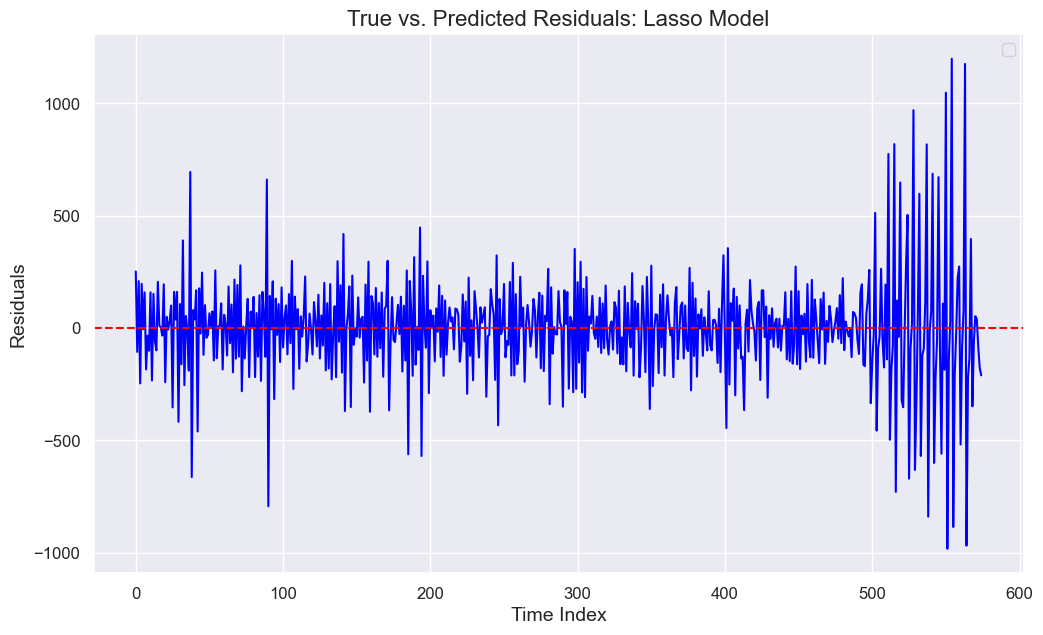

Test Scores: [207.1978833708152, 185.0086488552055, 161.58303339574195, 155.87386204737862, 391.0958064590666]
Mean of Test Scores: 220.1518468256416
Standard Deviation of Test Scores: 87.39182124395082
Standard Deviations above Baseline: 0.18951432829044296


In [54]:
from sklearn.linear_model import Lasso

# initializes Lasso regression
ML_algo = Lasso(random_state = 1030, max_iter = 10000)
param_grid_lasso = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
test_scores_lasso, mean_lasso, std_lasso, best_models_lasso, residuals_lasso, X_test_lasso, y_test_lasso = MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid_lasso, figure_number = 6)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations above Baseline: {abs((mean_lasso - baseline_rmse) / std_lasso)}")

Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -228.792424287242
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -229.67543665260527
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -197.67338233782743
Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -189.72922242883388


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Model Parameters: {'regressor__alpha': 100.0}
Validation Score: -182.69133290184763


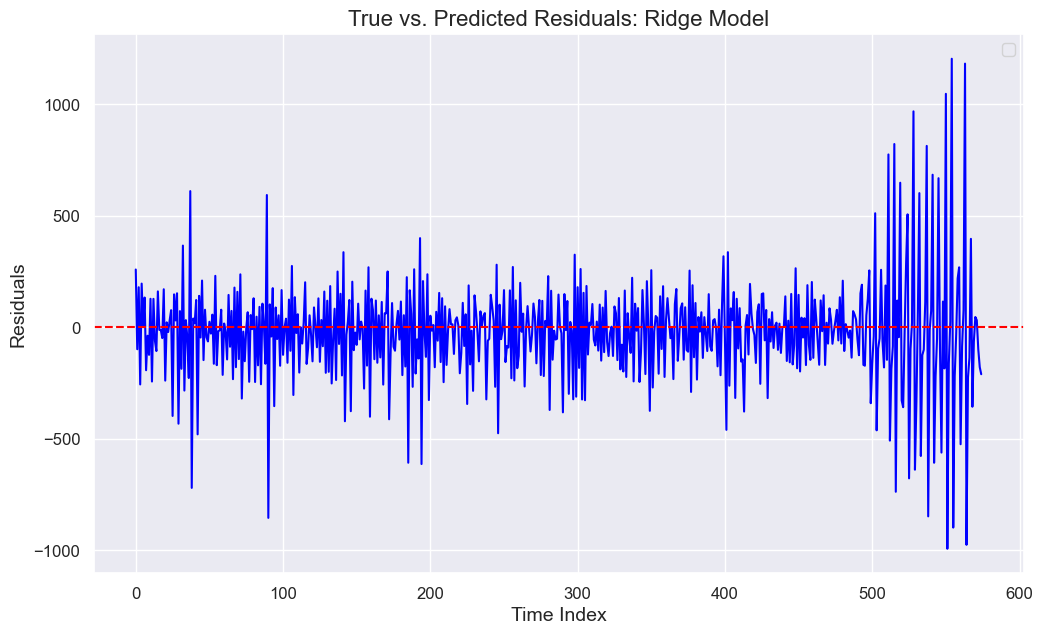

Test Scores: [207.0183748915749, 187.1542547742136, 164.13124459391116, 156.59733808474928, 393.30360078316835]
Mean of Test Scores: 221.64096262552343
Standard Deviation of Test Scores: 87.6461695582618
Standard Deviations above Baseline: 0.1719742753985893


In [55]:
from sklearn.linear_model import Ridge

# initializes Ridge regression
ML_algo = Ridge(random_state = 1030, max_iter = 10000)
param_grid_ridge = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}
test_scores_ridge, mean_ridge, std_ridge, best_models_ridge, residuals_ridge, X_test_ridge, y_test_ridge = MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid_ridge, figure_number = 7)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations above Baseline: {abs((mean_ridge - baseline_rmse) / std_ridge)}")

Best Model Parameters: {'regressor__max_depth': 1, 'regressor__max_features': None}
Validation Score: -238.71333069171814
Best Model Parameters: {'regressor__max_depth': 1, 'regressor__max_features': None}
Validation Score: -240.31496441538667
Best Model Parameters: {'regressor__max_depth': 1, 'regressor__max_features': None}
Validation Score: -222.18090089672873
Best Model Parameters: {'regressor__max_depth': 1, 'regressor__max_features': None}
Validation Score: -216.64107446532643


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Model Parameters: {'regressor__max_depth': 1, 'regressor__max_features': None}
Validation Score: -203.26215470543


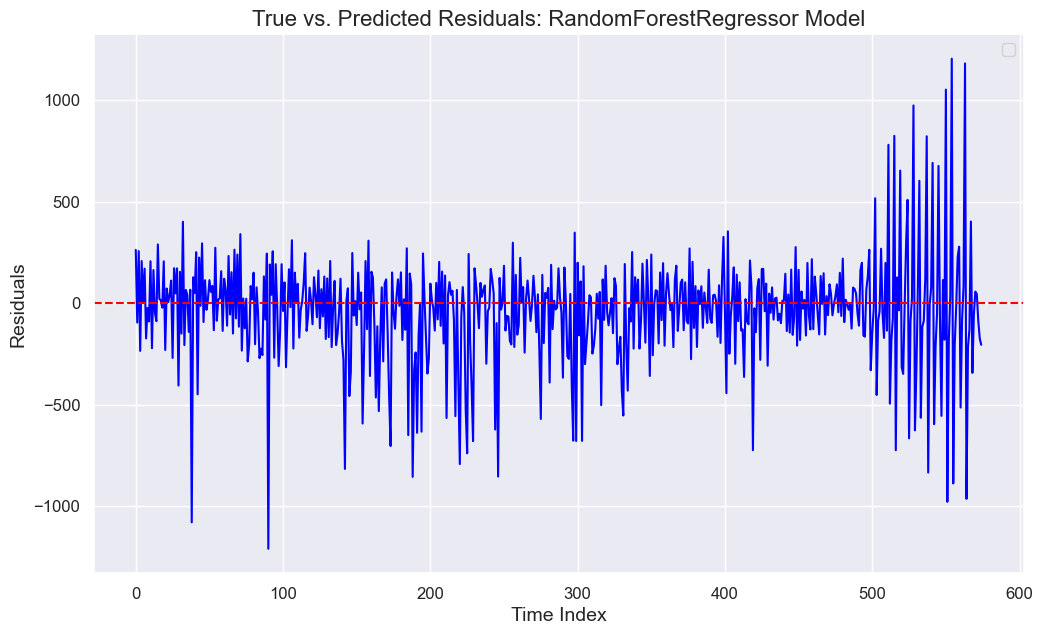

Test Scores: [230.7525408145573, 289.42381157634696, 236.87641161161267, 169.51306938513568, 391.35659410070247]
Mean of Test Scores: 263.58448549767104
Standard Deviation of Test Scores: 74.34254722682157
Standard Deviations below Baseline: -0.3614435793936471


In [56]:
from sklearn.ensemble import RandomForestRegressor

# initializes Random Forest regression
ML_algo = RandomForestRegressor(random_state = 1030)
param_grid_rf = {'regressor__max_depth': [None, 1, 3, 10, 30, 100], 'regressor__max_features': [None, 0.5, 0.75, 1.0]}
test_scores_rf, mean_rf, std_rf, best_models_rf, residuals_rf, X_test_rf, y_test_rf = MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid_rf, figure_number = 8)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations below Baseline: {-(mean_rf - baseline_rmse) / std_rf}")

Best Model Parameters: {'regressor__C': 10.0, 'regressor__gamma': 1000.0}
Validation Score: -227.0003840480289
Best Model Parameters: {'regressor__C': 10.0, 'regressor__gamma': 0.1}
Validation Score: -229.61343772914142
Best Model Parameters: {'regressor__C': 1.0, 'regressor__gamma': 1000.0}
Validation Score: -197.56142955990535
Best Model Parameters: {'regressor__C': 0.1, 'regressor__gamma': 0.001}
Validation Score: -188.86836303343898


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Model Parameters: {'regressor__C': 0.1, 'regressor__gamma': 1000.0}
Validation Score: -181.0432265995386


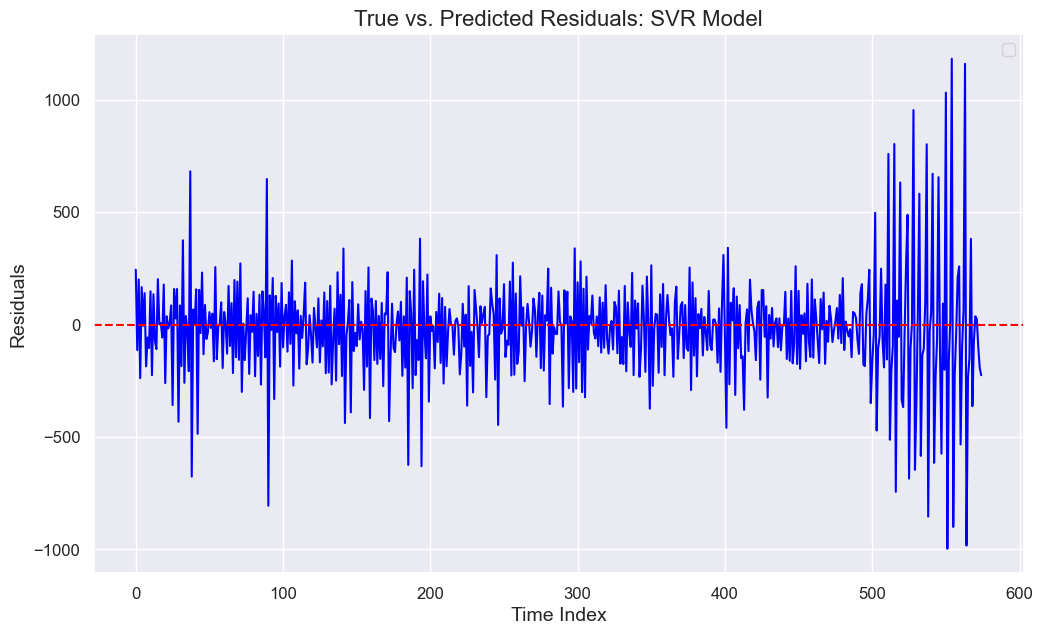

Test Scores: [208.18007868940353, 190.79406498617612, 162.02149399173274, 156.89316165403662, 391.45887553443947]
Mean of Test Scores: 221.8695349711577
Standard Deviation of Test Scores: 86.85314914185568
Standard Deviations above Baseline: 0.1709127913297048


In [57]:
from sklearn.svm import SVR

# initializes Support Vector Regression
ML_algo = SVR()
param_grid_svr = {'regressor__C': [1e-1, 1e0, 1e1], 'regressor__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5]}
test_scores_svr, mean_svr, std_svr, best_models_svr, residuals_svr, X_test_svr, y_test_svr = MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid_svr, figure_number = 9)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations above Baseline: {abs((mean_svr - baseline_rmse) / std_svr)}")

Best Model Parameters: {'regressor__n_neighbors': 9, 'regressor__weights': 'uniform'}
Validation Score: -240.06404643798223
Best Model Parameters: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Validation Score: -236.08351838685377
Best Model Parameters: {'regressor__n_neighbors': 8, 'regressor__weights': 'uniform'}
Validation Score: -213.56742691339952
Best Model Parameters: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Validation Score: -207.12912834231443


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Model Parameters: {'regressor__n_neighbors': 10, 'regressor__weights': 'uniform'}
Validation Score: -197.98808453838072


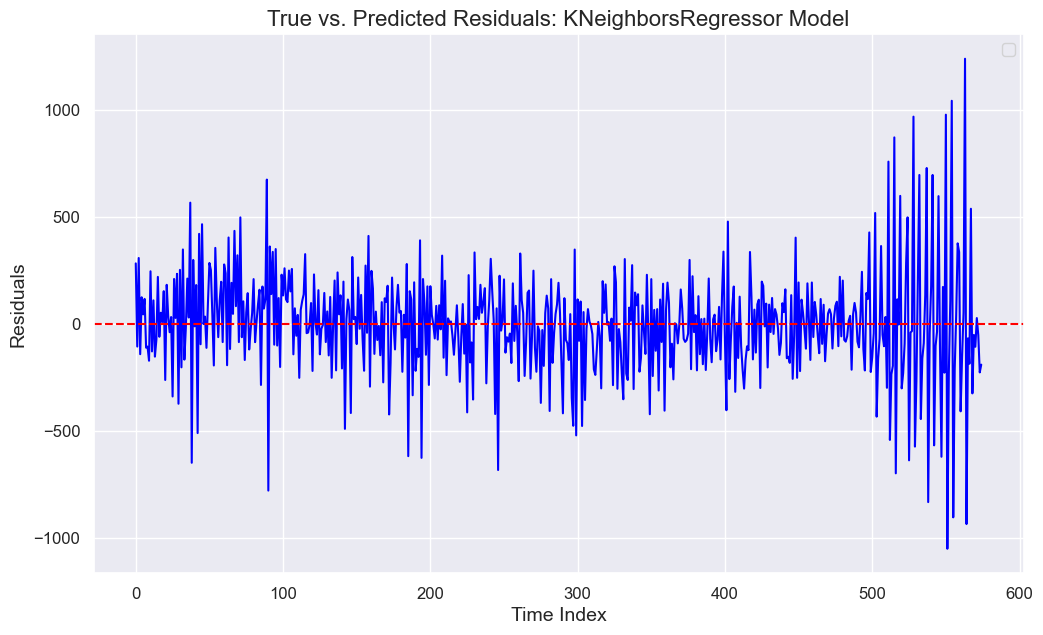

Test Scores: [235.6900051534937, 199.4307980663752, 207.38130346579925, 175.2704037616808, 389.71187651347265]
Mean of Test Scores: 241.49687739216432
Standard Deviation of Test Scores: 76.5777760886586
Standard Deviations below Baseline: -0.06245974367105319


In [58]:
from sklearn.neighbors import KNeighborsRegressor

# initializes K-Nearest Neighbors regression
ML_algo = KNeighborsRegressor()
param_grid_knn = {'regressor__n_neighbors': range(1, 11), 'regressor__weights': ['uniform', 'distance']}
test_scores_knn, mean_knn, std_knn, best_models_knn, residuals_knn, X_test_knn, y_test_knn = MLpipe_TimeSeries_CV(X, y, preprocessor, ML_algo, param_grid_knn, figure_number = 10)

# calculates the number of standard deviations from the baseline
print(f"Standard Deviations below Baseline: {-(mean_knn - baseline_rmse) / std_knn}")

#### Comparing all test scores

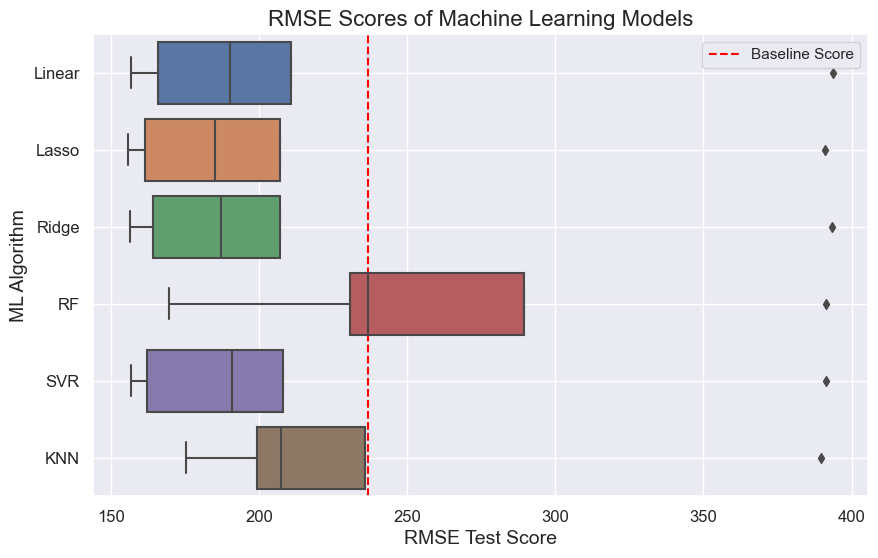

In [59]:
# instantiates a dataframe containing the test scores
df_boxplot = {'Linear': [210.8737211717959, 190.24385889618617, 165.72402707926884, 156.9335949397303, 393.69895635829505],
              'Lasso': [207.1978833708152, 185.0086488552055, 161.58303339574195, 155.87386204737862, 391.0958064590666],
              'Ridge': [207.0183748915749, 187.1542547742136, 164.13124459391116, 156.59733808474928, 393.30360078316835],
              'RF': [230.7525408145573, 289.42381157634696, 236.87641161161267, 169.51306938513568, 391.35659410070247],
              'SVR': [208.18007868940353, 190.79406498617612, 162.02149399173274, 156.89316165403662, 391.45887553443947],
              'KNN': [235.6900051534937, 199.4307980663752, 207.38130346579925, 175.2704037616808, 389.71187651347265]}
df_boxplot = pd.DataFrame(df_boxplot)

# sets a style
sns.set_style('darkgrid')

# plots the test scores
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_boxplot, orient = 'h')
plt.grid(True)
plt.xlabel('RMSE Test Score', fontsize = 14)
plt.ylabel('ML Algorithm', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('RMSE Scores of Machine Learning Models', fontsize = 16)

# labels the baseline RMSE score
plt.axvline(x = baseline_rmse, color = 'red', linestyle = '--', label = 'Baseline Score')
plt.legend()

plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', 'Figure 11.png'), dpi = 300)
plt.show()

### Part 6: Interpretability

#### Evaluating global feature importance

Best Model Parameters: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.03, 'regressor__missing': nan, 'regressor__n_estimators': 10000, 'regressor__seed': 0, 'regressor__subsample': 0.66}


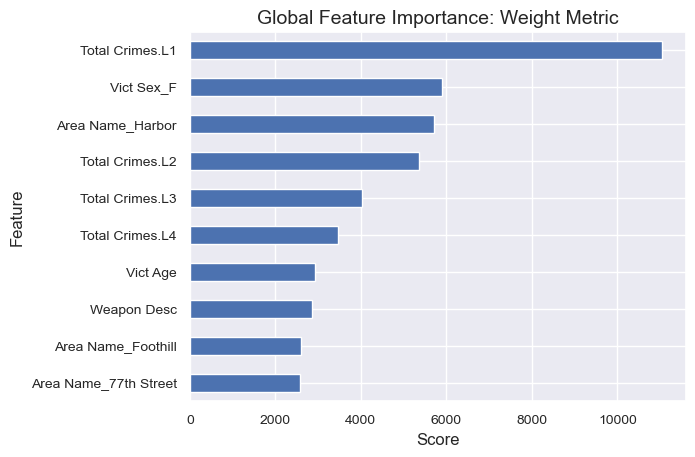

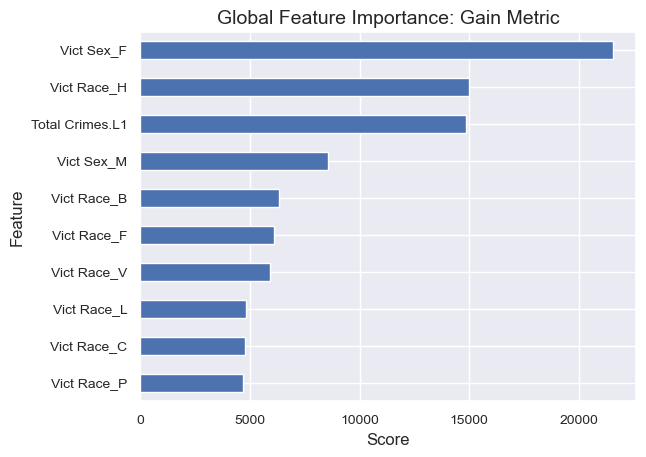

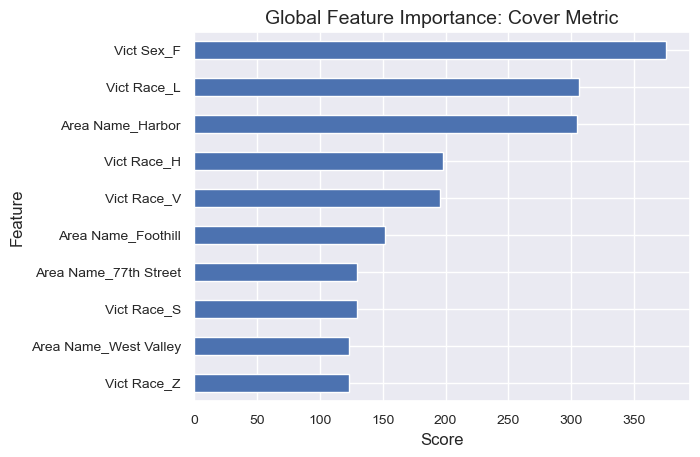

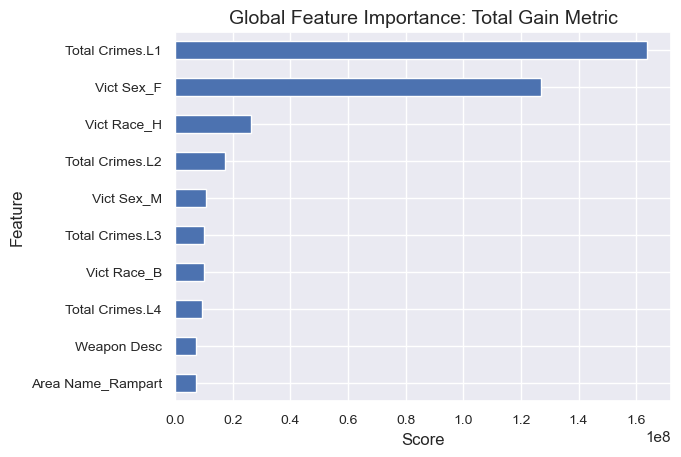

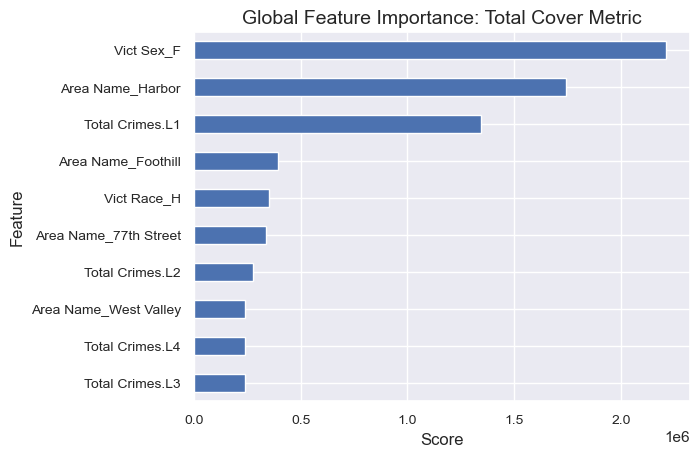

In [60]:
import xgboost

# defines the feature matrix and target variable
X = df4.drop(columns = ['Date Occurred', 'Total Crimes'])
y = df4['Total Crimes']

# sets a figure counter
figure_counter = 11

# defines the XGBoost regressor and parameter grid
param_grid = {
    'regressor__learning_rate': [0.03],
    'regressor__n_estimators': [10000],
    'regressor__seed': [0],
    'regressor__missing': [np.nan],
    'regressor__colsample_bytree': [0.9],
    'regressor__subsample': [0.66]}

# modifies the pipeline to include XGBRegressor
pipe = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', xgboost.XGBRegressor())])

# initializes and fits GridSearchCV
gridsearch = GridSearchCV(estimator = pipe, 
                          param_grid = param_grid, 
                          cv = TimeSeriesSplit(n_splits = 5), 
                          n_jobs = -1)
gridsearch.fit(X, y)
print(f'Best Model Parameters: {gridsearch.best_params_}')

# trains the XGBoost model with the best parameters
best_params = gridsearch.best_params_
XGB = xgboost.XGBRegressor(**{param.split("__")[1]: value for param, value in best_params.items()})
XGB.fit(X, y)

# defines the different metrics for feature importance
metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

# iterates over the different metrics
for metric in metrics:

    # gets scores for each feature from the XGBoost model
    scores = XGB.get_booster().get_score(importance_type = metric)

    # sorts the scores in descending order
    sorted_scores = dict(sorted(scores.items(), key = lambda item: item[1], reverse = True))

    # prepares a dataframe for the top 10 features
    df_importance = pd.DataFrame(list(sorted_scores.items()), columns = ['Feature', 'Score']).head(10)

    # reverses the dataframe to display top features at the top
    df_importance = df_importance.iloc[::-1]

    # plots the feature importance scores
    ax = df_importance.plot(x = 'Feature', y = 'Score', kind = 'barh', legend = False)
    formatted_title = metric.replace('_', ' ').title() 
    plt.title(f"Global Feature Importance: {formatted_title} Metric", fontsize = 14) 
    plt.xlabel('Score', fontsize = 12)
    plt.ylabel('Feature', fontsize = 12)
    ax.tick_params(axis = 'x', labelsize = 10)
    ax.tick_params(axis = 'y', labelsize = 10)
    figure_counter += 1
    plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', f'Figure {figure_counter}.png'), dpi = 300)
    plt.show()

#### Calculating local feature importance

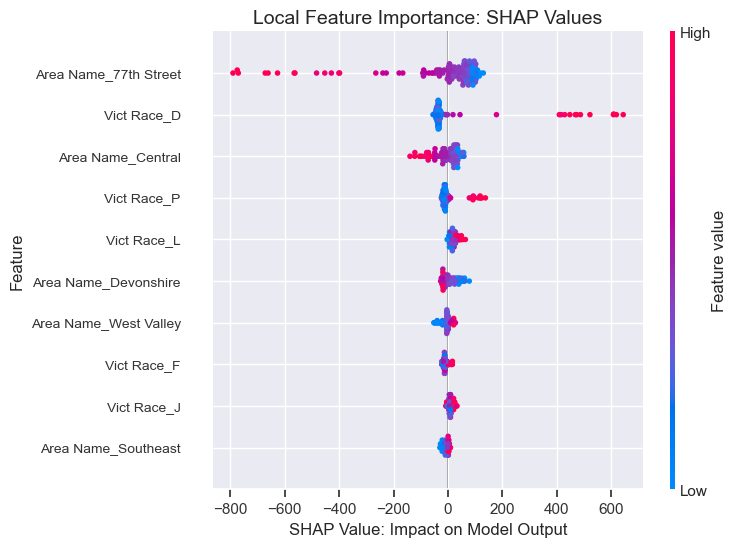

In [61]:
import shap
import warnings

# temporarily disables specific warnings related to data colormapping
warnings.filterwarnings('ignore', message = "No data for colormapping provided via 'c'")

# creates the explainer object with the XGBoost model
explainer = shap.TreeExplainer(XGB)

# calculates SHAP values on the test set
X_test_lasso = X_test_lasso.drop(columns = ['Date Occurred'])
X_test_transformed = X_test_lasso.values
shap_values = explainer.shap_values(X_test_transformed)

# plots the global feature importance values for the top 10 most important features
plt.figure()
shap.summary_plot(shap_values, features = X_test_transformed, feature_names = feature_names, max_display = 10, show = False)

# adds a title and reformats the axes
plt.title('Local Feature Importance: SHAP Values', fontsize = 14)
plt.xlabel('SHAP Value: Impact on Model Output', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.gca().tick_params(axis = 'x', labelsize = 11)
plt.gca().tick_params(axis = 'y', labelsize = 10)
plt.savefig(os.path.join('/Users/Aryan/Desktop/data-1030-project/results', 'Figure 17.png'), dpi = 300)
plt.show()